In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

    id_zone : numéro de zone
    id_quartier : numéro de quartier
    nom_quartier : nom du quartier
    piece : nombre de pièces
    epoque : période de construction
    meuble_txt : meublé/non meublé
    ref : loyer de référence en euros par mètre carré de surface habitable
    max : loyer maximum
    min : loyer minimum
    geo_shape : géométrie du logement
    geo_point_2D : coordonnées du logement

In [26]:
data = pd.read_csv('D:/ML/logement-encadrement-des-loyers.csv',sep = ';')
data.head()
data.shape

(2560, 14)

In [27]:
X = pd.DataFrame(data,columns = ['nom_quartier','piece',
                                 'epoque','meuble_txt'])
Y = data['ref']

X = pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                          test_size = 0.1)

print(len(Y_train))

2304


In [28]:
regressor = RandomForestRegressor(n_estimators = 1000, 
                                  random_state = 0)

regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
y_pred = regressor.predict(X_test)

No handles with labels found to put in legend.


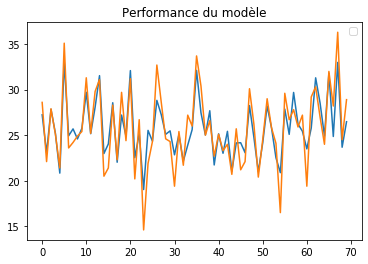

In [31]:
import matplotlib.pyplot as plt

plt.title('Performance du modèle')
plt.plot(list(y_pred)[:70])
plt.plot(list(Y_test)[:70])
plt.legend()

Evidemment le fait d’avoir des bons résultats sur les premières valeurs ne donne aucune indication sur la performance globale du modèle. Pour cela on utilise plutôt des métriques comme l’erreur quadratique moyenne ou la MAPE.

Il intéressant de voir comment avec un modèle aussi simple on a réussi à avoir d’aussi bonnes performances. On peut même aller plus loin en exploitant de façon plus précise les données.

Par exemple en calculant la surface et en prenant en compte la géométrie des logements. De même on aurait pu exploiter de façon plus poussée la localisation. Plutôt que d’utiliser le découpage par défaut donné par la mairie de Paris, prendre en compte les positions exactes pourrait nous aider.